<font size=6  color=#003366> <b>[LEPL1109] - STATISTICS AND DATA SCIENCES</b> <br><br> 
<b>Hackathon 02 - Classification: Stars, Galaxies and Quasars </b> </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

<br><br>
Anne-Sophie Collin   (anne-sophie.collin@uclouvain.be)<br>
Guillaume Van Dessel (guillaume.vandessel@uclouvain.be)<br>
Jérome Eertmans (jerome.eertmans@uclouvain.be)<br>
Antoine Legat (antoine.legat@uclouvain.be)<br>
<div style="text-align: right"> Version 2023</div>

<br><br>
</font>

<font size=5 color=#009999> <b>GUIDELINES & DELIVERABLES</b> </font> <br>
-  This assignment is due on the <b>04 December 2023 at 22h00</b>.
-  Copying code or answers from other groups (or from the internet) is strictly forbidden. <b>Each source of inspiration (stack overflow, git, ChatGPT, other groups,...) must be clearly indicated!</b>
-  This notebook (with the "ipynb" extension) file, the report (PDF format) and all other files that are necessary to run your code must be delivered on <b>Moodle</b>.
- Only the PDF report will be graded on content and quality of the text / figures. <br><br>

<div class="alert alert-danger">
<b>[DELIVERABLE] Summary</b>  <br>
After the reading of this document (and playing with the code!), we expect you to provide us with:
<ol>
   <li> a PDF file (written in LaTeX, see example on Moodle) that answers all the questions below. The report should contain high quality figures with named axes (we recommend saving plots with the <samp>.pdf</samp> extension);
   <li> this Jupyter Notebook (it will not be read, just checked for plagiarism);
   <li> and all other files (not the datasets!) we would need to run your code.
</ol>
</div>



<br><font size=5 color=#009999> <b>CONTEXT & OBJECTIVE </b> </font> <br>
    

### Context

The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. In this hackathon, we will investigate the classification of stars based on their spectral characteristics. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

![](https://storage.googleapis.com/kaggle-datasets-images/1866141/3047436/9aaba4abadbffd3dcdb1e0fab8b75a6d/dataset-cover.jpg?t=2022-01-15-17-18-30)


### Objectives

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. The project aims at building a ternary classifier for the following 3 classes: star, galaxy or quasar. 


### Notebook structure
This notebook is organized into four parts. Each of them assesses one fundamental step to solve our problem and provides one visualization tool to gain some understanding:
* PART 1 - DATA LOADING
   - 1.1 - Discover the dataset
   - Bonus: Visualization of alpha and delta 
   - 1.2 - Discard irrelevant features 
   - 1.3 - Split the dataset
    <br><br>
* PART 2 - EXPLORATORY DATA ANALYSIS 
   - 2.1 - Ternary targets
   - 2.2 - Correlation matrix
   - 2.3 - Data scaling and normalization
    <br><br>
* PART 3 - MODEL SELECTION
   - 3.1 - Precision, recall and F1-score
   - 3.2 - Model evaluation
   - 3.3 - Model selection and parameters tuning
   - 3.4 - Precision-Recall curve and thresholding
   <br><br>
* PART 4 - MODEL TESTING
   - 4.1 - Error computation on the test set


In [13]:
## warnings off
import warnings
warnings.filterwarnings("ignore")




<br><br><font size=7 color=#009999> <b>PART 1 - DATA LOADING</b> </font> <br>

<font size=4 color=#009999> <br> 1.1 - DISCOVER THE DATASET </font> <br>

**Import** `star_classification.csv` using `read_csv` [<sup>1</sup>](#fn1) from pandas and **obtain** a brief description of the data (size, variables type, missing values, etc.).  

<div class="alert alert-warning">
    <b>[Question 1.1]</b> Describe, briefly, your dataset (size, variables type, missing values, etc.).<br>
</div> 

In [14]:
"""
CELL N°1 : Import the dataset using pd.read_csv function 

@pre: filename 'star_classification.csv', located in the same folder as this jupyter
@post: variable `df` containing the dataframe
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("star_classification.csv")

<font size=4 color=#009999> <br> BONUS - VISUALIZATION OF ALPHA AND DELTA </font> <br>

The `alpha` and `delta` features encodes the angular locations of the objects. Those locations can be projected on a celestial sphere, showing the distribution of objects in the sky. Purpose of the following cell is for visualization only. 


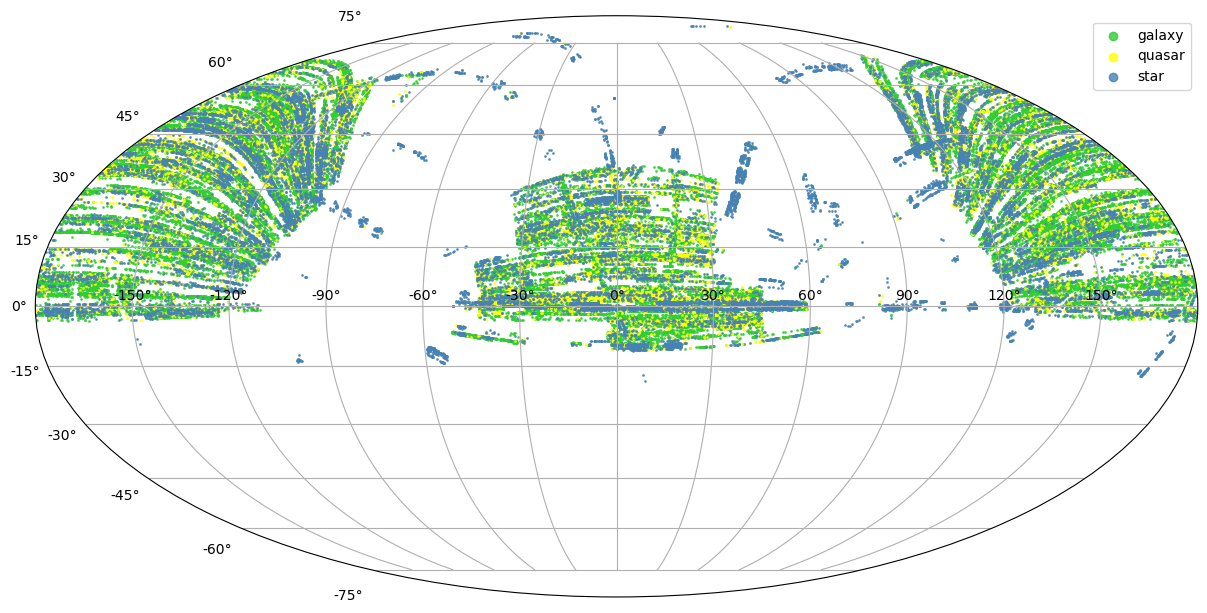

In [15]:
#pip install astropy # Comment this line once the package has been installed

from astropy.coordinates import SkyCoord
import astropy.units as u

df_galaxy = df.loc[df['class']=='GALAXY']
df_quasar = df.loc[df['class']=='QSO']
df_star   = df.loc[df['class']=='STAR']

np.asarray(df_galaxy['alpha'])*u.degree

coords_galaxy = SkyCoord(ra=np.asarray(df_galaxy['alpha'])*u.degree, dec=df_galaxy['delta']*u.degree, frame='icrs', unit='deg')
coords_quasar = SkyCoord(ra=np.asarray(df_quasar['alpha'])*u.degree, dec=df_quasar['delta']*u.degree, frame='icrs', unit='deg')
coords_star   = SkyCoord(ra=np.asarray(df_star['alpha'])*u.degree, dec=df_star['delta']*u.degree, frame='icrs', unit='deg')

fig = plt.figure(figsize=(15,15))
ax  = fig.add_subplot(111, projection='mollweide')
ax.scatter(coords_galaxy.ra.wrap_at(180*u.degree).radian, coords_galaxy.dec.radian, 
               s=1, label='galaxy', color='limegreen', alpha=0.8)
ax.scatter(coords_quasar.ra.wrap_at(180*u.degree).radian, coords_quasar.dec.radian, 
               s=1, label='quasar', color='yellow', alpha=0.8)
ax.scatter(coords_star.ra.wrap_at(180*u.degree).radian, coords_star.dec.radian, 
               s=1, label='star', color='steelblue', alpha=0.8)
ax.legend(markerscale=6)
ax.grid()
plt.show()



<font size=4 color=#009999> <br> 1.2 - DISCARD IRRELEVANT FEATURES </font> <br>

It is usually hard to determine in adavace which features, or combination of features, will be the most relevant to perform the classification task. The rule of thumb is to **keep all the features** for which you have **doubts**. In some specific cases, however, it is possible to identify certain features that can make no contribution to the classification task. To do this, it is useful to observe the distribution of our observations for each feature. 

We therefore focus on identifying **features whose distribution cannot provide any relevant information** for classification. It is therefore a question of identifying them on the basis of a **numerical decision** and **not** on the basis of a decision linked to the **physical meaning** of the feature.

<div class="alert alert-warning">
    <b>[Question 1.2]</b> Based on a study of the features distribution (variance, number of unique values, number of missing values, etc.), can you identify some features that do not provide useful information for the classification task? Explain your analysis and remove those features from the dataset. <br>
</div> 

In [16]:
"""
CELL N°2 : Remove useless features

@pre: variable `df` containing the dataframe
@post: variable `df` containing the reduced dataframe
"""
variances = []
nb_uniques = []

dataset_size = len(df)
print(f"Dataset size: {dataset_size}")

# iterate through features
for column in list(df.columns):
    print(f"Column {column}:")
    # count the number of unique values and missing values in our column
    unique_values = df[column].nunique()
    nb_uniques.append(unique_values)

    missing_value = df[column].isnull().sum()
    if column != 'class':
        variance = np.var(df[column])
        variances.append(variance)
        print(f"Variance: \t {variance}")
    else:
        variances.append(0)
    
    print(f"Unique values: \t {unique_values}")
    print(f"Missing values: \t {missing_value}\n")

    # for the 'class' column (string)
    if column == 'class':
        continue 
    else:
        if variance == 0:
            print(f"Column '{column}' has a variance of 0")
            # delete the feature that has constant equal values. This feature shouldn't have any effect on our model, and is therefore useless. 
            df.drop(column, axis=1, inplace=True)

columns = ["obj_ID","alpha","delta","u","g","r","i","z","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","class","redshift","plate","MJD","fiber_ID"]
print(nb_uniques)
print(variances)
df.describe()



Dataset size: 100000
Column obj_ID:
Variance: 	 7.120858100119071e+25
Unique values: 	 78053
Missing values: 	 0

Column alpha:
Variance: 	 9312.589371574764
Unique values: 	 99999
Missing values: 	 0

Column delta:
Variance: 	 385.90901971786263
Unique values: 	 99999
Missing values: 	 0

Column u:
Variance: 	 1009.2777452948732
Unique values: 	 93748
Missing values: 	 0

Column g:
Variance: 	 1008.07098217161
Unique values: 	 92651
Missing values: 	 0

Column r:
Variance: 	 3.4400991224334767
Unique values: 	 91901
Missing values: 	 0

Column i:
Variance: 	 3.090163192492291
Unique values: 	 92019
Missing values: 	 0

Column z:
Variance: 	 1006.6655489963745
Unique values: 	 92007
Missing values: 	 0

Column run_ID:
Variance: 	 3860261.3015995864
Unique values: 	 430
Missing values: 	 0

Column rerun_ID:
Variance: 	 0.0
Unique values: 	 1
Missing values: 	 0

Column 'rerun_ID' has a variance of 0
Column cam_col:
Variance: 	 2.5182652079027026
Unique values: 	 6
Missing values: 	 0

C

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


<font size=4 color=#009999> <br> 1.3 - SPLIT THE DATASET </font> <br> 

Data science projects begin by the division the **whole** dataset into a **training** and a **test** set. The subsequent analysis and decisions (i.e. features selection, pre-processing, model selection, etc.) are, then, conducted only on the _training set_ to stay statistically significant during the **testing phase**. The latter will, thus, only be conducted on the _test set_.  

We invite you then to **split** [<sup>2</sup>](#fn2) the dataset into a _training_ and a _test_. The proportion of each subset is at **your own discretion**.


<span id="fn2"> [2] N.B. Set the seed of your random split with `random_state = 42` to obtain reproducible results.</span>



<div class="alert alert-warning">
    <b>[Question 1.3]</b> What are the drawbacks (if any) of choosing a small test set (in proportion)? On the contrary, what are the consequences (if any) of a relatively large testing set (in proportion)? <br>
</div> 

In [17]:
"""
CELL N°3 : SPLIT THE DATASET    

@pre:  'df' a pandas frame with the entire dataset
@post: 2 pandas frames with the train and test sets
"""

from sklearn.model_selection import train_test_split


# We give 0.1 of our data proportion for testing, the rest for training. 
# It is advised to use between 10 to 20 % of our dataset to test our model. 
# 1000 entries should be enough to test in our case, and will result in better training
# (ref: https://realpython.com/train-test-split-python-data/)
data_train, data_test = train_test_split(df, test_size=0.1, train_size=0.9, random_state = 42)



<br>

<br><font size=7 color=#009999> <b>PART 2 - EXPLORATORY DATA ANALYSIS </b> </font> <br><br>

We conduct the analysis on the <i>training set</i>, avoiding therefore any modelling decision based on _unseen_ data (<i>test set</i>). In most cases, we assume that the distribution of this latter set stays similar to the <i>training set</i>.

<font size=4 color=#009999> <br> 2.1 - TERNARY TARGETS   </font> <br>

It's always useful to have an idea of the difficulty of the task in hand. More specifically, it is possible to determine a priori the expected **performance of a random classifier**. This constitutes the **baseline** that our model will logically have to beat. 

<div class="alert alert-warning">
    <b>[Question 2.1]</b> Are the ternary classes balanced? What are the proportions of data in each class? Briefly, justify your answer and add a visualization.
</div> 

<div class="alert alert-warning">
    <b>[Question 2.2]</b> What would be the expected performance of a random classifier on this dataset?
</div> 



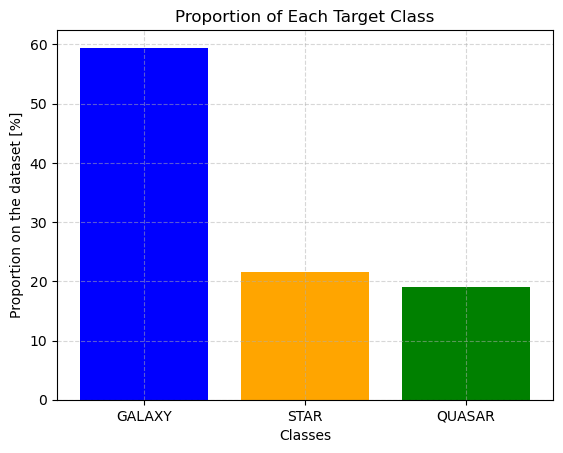

In [18]:
"""
CELL N°4 : TERNARY CLASSES :  proportion and ternarization

@pre:  Training dataframe  
@post: Proportion of each ternary class in this train set, a graph representing it, 
a modified training dataframe with a new column 'classes_ternary' continaining the ternary targets (0,1,2)
"""
# 1. New column: 'classes_ternary'
# Map class value with corresponding target
class_mapping = {'GALAXY': 0, 'STAR': 1, 'QSO': 2}

# create the new column 
df['classes_ternary'] = df['class'].map(class_mapping)

# 2. Plot len(df)
class_counts = df['classes_ternary'].value_counts() /len(df)

# Create a bar chart
plt.bar(class_counts.index, class_counts.values*100, color=['blue', 'orange', 'green'])
plt.xlabel('Classes')
plt.ylabel('Proportion on the dataset [%]')
plt.title('Proportion of Each Target Class')
plt.xticks(class_counts.index, ['GALAXY', 'STAR', 'QUASAR'])
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## Result
<div class="alert alert-warning">
    <b>[Question 2.1]</b> Are the ternary classes balanced? What are the proportions of data in each class? Briefly, justify your answer and add a visualization.
</div> 
The answer is quite simple: No, our ternary classes are not balanced. We have about 60% of Galaxies, 22% of Stars and 18% of Quasars. 

* This could have some consequences on our training, as galaxies are more represented that other types. 

<div class="alert alert-warning">
    <b>[Question 2.2]</b> What would be the expected performance of a random classifier on this dataset?
</div> 
As we have unbalanced classes, and that the Galaxy's class is more prevalent in the training set, the expected accuracy of a random classifier would be reflecting the dominance of the majority class. We therefore won't have a perfect accuracy. 

If we had balanced classes, each class would have 33% chance of been selected by the random classifier. 


<font size=4 color=#009999> <br> 2.2 - CORRELATION MATRIX </font> <br>

__Compute__ and __plot__ the correlation matrix. For the plot, you can use the function `imshow` or `matshow` from `matplotlib`.

<div class="alert alert-warning">
    <b>[Question 2.3]</b> Compute the correlation matrix of the dataset and plot it. Do you want to discard features based on this observation?  <br>
Write clearly you decision rule.                                                                                      
</div> 

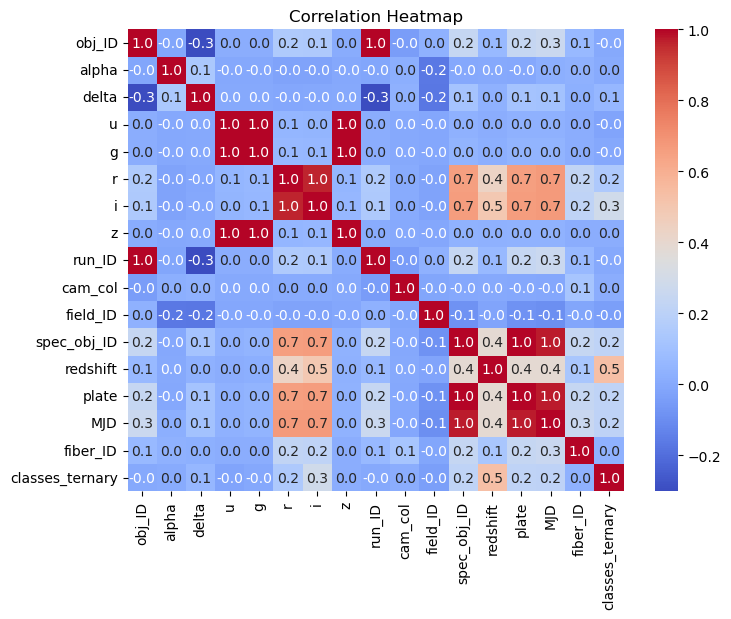

In [19]:
"""
CELL N°5 : CORRELATION MATRIX
   
@pre:  Training dataframe  
@post: The correlation matrix between the features (target incl.) and its plot    
"""
import plotly.graph_objs as go
import seaborn as sns

# data_train contains the training dataset. 
# (help source: https://www.tutorialspoint.com/how-to-create-correlation-matrix-in-python-by-traversing-through-each-line)

data_without_class = df.drop('class', axis=1)

# Création du heatmap


plt.figure(figsize=(8, 6))
sns.heatmap(data_without_class.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()





<font size=4 color=#009999> <br> 2.3 - DATA SCALING AND NORMALIZATION</font> <br> 

__Split__ your _training_ and _test_ sets into their respective features set  (X)  and a ternary target variable (y). __Standardize__ the features sets. 


__Remark 1.__ The scaler object, used to scale the <i>training set</i>, should also be the one used on the <i>test set</i>! Again, do no reinvent the wheel!  


<div class="alert alert-warning">
    <b>[Question 2.4]</b>  Why do we scale data? Justify properly, whether it is necessary or not for your feature set (X) and which scaler did you use.
</div> 

In [20]:
"""
CELL N°6 : Data fill-in & scaling
   
@pre: train and test dataframes and the list 'feature_names' of columns to keep    
@post:  X_train: numpy array, with (scaled) selected features, containing training data
        X_test: numpy array, with (scaled) selected features, containing testing data. 
                The scaling should be done using the statistic of the train set.
"""

from sklearn.preprocessing import StandardScaler, MinMaxScaler


## Feature to discard (add some if necessary)
feature_names = ["class"]
X_train       = data_train.drop(columns = feature_names)
X_test        = data_test.drop(columns = feature_names)

min_max_scaler = MinMaxScaler()

X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

X_train = X_train_minmax
X_test = X_test_minmax

<br>

<font size=4 color=#009999>  </font> <br>

<br><font size=7 color=#009999> <b>PART 3 - MODEL SELECTION </b> </font> <br><br>


Let us first build some tools that will help us to choose among our investigated models together with their (hyper-)parameters which one performs the best. 

<font size=4 color=#009999> <br> 3.1 - PRECISION, RECALL AND F1 SCORE </font> <br>

**Implement** the _precision, recall_ and _F-measure_ metrics based on the confusion matrix. Please follow the specifications in the provided template.  <br>

**Reminder**

$F_1$ is a performance score allowing to obtain some trade-off between the precision and recall criterions. It can be computed as follows:
$$F_1 = 2~\frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}.$$

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/F-score) for further information about the metric.

**NOTE**: if ever the model you built would be terribly <i>bad</i>, with both precision's and recall's value equal to $0$, we suggest to return $0$ as $F_1$ score. 

In [21]:
"""
CELL N°7 : Implementation of precision, recall & F1 scores

@pre:  /  
@post: Follow the specifications to implement precision, recall and probas_to_F1 functions. 
"""
from sklearn.metrics import confusion_matrix, f1_score

""" -----------------------------------------------------------------------------------------
Converts a vector of real probability values to a binary 0 or 1 
@pre: 
    - proba_vec: vector with real values representing each a probability
    - threshold : a threshold probability (between 0 and 1)
@post:
    - predicted_labels: binary prediction vector, with elements being 0 or 1.
----------------------------------------------------------------------------------------- """


def pred_probas_to_pred_labels(proba_vec, threshold=0.5):
    return np.where(proba_vec <= threshold, 0, 1)


""" -----------------------------------------------------------------------------------------
Based on the confusion matrix, computes the 'precision'
@pre: 
    - cm : confusion_matrix of a binary classification
@post:
    - score: precision (or positive predictive value), associated with cm
----------------------------------------------------------------------------------------- """

"""for the precision and recall function we have to keep in mind that the format of 
the confusion matrix is not always the same so if we have weird result at the end, it can come from here"""

"""

La confusion matrix:
         _              _
        |    TP      FP  |          avec TP: true positive, 
        |    FN      TN  |          FP: false positive,
        |_              _|          FN: false negative,
                                    TN: true negative.

"""


def precision(cm):
    """
    on sait que la formule de calcul de la précision grace à la confusion matrix,
    est true_positive/ (true_positive + false_negative)
    """
    
    #on récupère les elements de la confusion matrix
    TP = cm[0][0]  # TP FP
    FP = cm[0][1]  # FN TN

    ppv = TP / (TP + FP)

    return ppv


""" -----------------------------------------------------------------------------------------
Based on the confusion matrix, computes the 'recall'
@pre: 
    - cm : confusion_matrix of a binary classification  
@post:
    - r: recall (or true positive rate), associated with cm
----------------------------------------------------------------------------------------- """


def recall(cm):
    """
    on sait que la formule de calcul de la précision grace à la confusion matrix,
    est true_positive / (true_positive + false_negative)
    """

    #on récupère les elements de la confusion matrix
    TP = cm[0][0] # TP FP
    FN = cm[1][0] # FN TN

    tpr = TP / (TP + FN)

    return tpr


""" -----------------------------------------------------------------------------------------
Evaluates the F1 score which is a harmonic mean of the precision and recall
@pre: 
    - y_true: vectors of 0 and 1 representing the real class values
    - y_pred: vectors of real values representing predicted probability
    - output:  'F1' means that the output should only be the F1 score. 
               'PRF1' means that the output is a tuple with (precision, recall, F1)
               'F1' is the default value
    - threshold: a threshold probability (between 0 and 1) 
@post:
    - F1_score: harmonic mean of the precision and recall
    - If asked in argument, precision and recall can be added in the output: (precision, recall, F1)
----------------------------------------------------------------------------------------- """


def probas_to_F1(y_true, y_pred, output="F1", threshold=0.5):

    y_pred = pred_probas_to_pred_labels(y_pred, threshold)

    cm = confusion_matrix(y_true, y_pred)
    precision_value = precision(cm)
    recall_value = recall(cm)
    F1_score = f1_score(y_true, y_pred, None)

    if output == "PRF1":
        return precision_value, recall_value, F1_score
    else:
        return F1_score

<font size=4 color=#009999> <br> 3.2 - MODEL EVALUATION  </font> <br>

**Implement** `evalParam`, which evaluates, using a __k-fold__ cross-validation, a list of `scikit-learn` models. Use your method `probas_to_F1` as score function. The function `evalParam` must be  **scalable**. Put differently, it must handle $m$ methods, and a variable list of their possible parameters configuration. 


In addition of the list of _models_ (methods) and their list of _hyperparameters_ (param), the function takes as arguments the _features set_ (X), _target variable_ (y) and _the number of folds_ (cv). 

It returns an array _score_ such that <br>

$$score[i][j] = average F1 over the folds, using method _i_ with parameters configuration j.$$

To help you, here is a pseudo code of K-fold for one method and one configuration of hyperparameters. 

<img src="K-fold_pseudo-code.png" width = "650">
 
__Remark 1.__ You have to implement a K-fold cross-validation. You are only allowed to use `KFold.splits(dataset)` from `sklearn.model_selection` to generate the indices of your different folds. 


<div class="alert alert-warning">
    <b>[Question 3.1]</b>
    Explain the idea of K-fold cross-validation and why it is useful. How the choice of K (in the cross-validation) impacts the bias and the variance of the scores obtained on the different folds? Choose and justify the number of folds you consider in this project. 
</div> 

In [22]:
"""
CELL N°8 : Evaluates the methods using different parameters via a K-folds with cv folds

@pre: 
    - methods: list of classifiers to analyze
    - param: list of size len(methods) containing lists of parameters (in dictionary form) to evaluate.
             In other words, param[i][j] is a dictionary of parameters.
             For example if index i is for KNN, we can have a parameter configuration (with index j) described as
                 param[i][j] = {"n_neigbors":5, "weights": 'uniform'}; 
                 while param[i] is a list of such parameters dictionnaries for model i (here KNN)
    - X: training dataset
    - y: target vector for the corresponding entries of X
    - cv: the number of folds to use in your cross-validation
@post:
    - score: list with same shape as param. score[i][j] = mean score over the folds, 
                                                         using method i with parameters param[i][j]
------------------------------------------------------------------------------------------------ """
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def evalParam(methods, param, X, y, cv):
    best_f1_scores = []

    for model, param in zip(methods, params):
        best_f1_score = 0
        best_params = None

        for p in param:
            model.set_params(**p)
            
            # Use cross_val_score for cross-validation
            cv_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')
            mean_f1_score = np.mean(cv_scores)

            if mean_f1_score > best_f1_score:
                best_f1_score = mean_f1_score
                best_params = p

        best_f1_scores.append((best_f1_score, best_params))
    
    return best_f1_scores

    '''''
    num_methods = len(methods)
    score = np.zeros((num_methods, len(param[0])), dtype=float)  # Initialize the score matrix

    # KFold for cross-validation
    kfold = KFold(n_splits=cv)

    for i, method in enumerate(methods):
        for j, params in enumerate(param[i]):
            method.set_params(**params)  # Set hyperparameters for the fold

            fold_scores = []
            for trn_idx, tst_idx in kfold.split(X):
                X_train, X_val = X.iloc[trn_idx], X.iloc[tst_idx]
                y_train, y_val = y.iloc[trn_idx], y.iloc[tst_idx]

                method.fit(X_train, y_train)
                y_pred = method.predict(X_val)

                f1_score = probas_to_F1(y_val, y_pred)
                fold_scores.append(f1_score)

            avg_f1 = np.mean(fold_scores)
            score[i][j] = avg_f1

    return score'''

<font size=4 color=#009999> <br> 3.3 - MODEL SELECTION AND PARAMETERS TUNING </font> <br>

__Run__ your function `evalParam` to evaluate the three following models : [_linear regression_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), [_logistic regression_](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [_K nearest neighbors_](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). <br>These models are already implemented in sklearn. <br>

**Study** the effect of the following hyperparameters:
- `n_neighbors` in KNN (try selected values between 1 and 100),
- `weights` in KNN (try both values 'uniform' and 'distance')
- `p` in KNN (try euclidean (p=2), manhattan (p=1) and minkowski-100 (more or less equivalent to max-norm))
- `C` in logistic regression (try selected values between $10^{-3}$ and $10^3$)</li>


<div class="alert alert-warning">
    <b>[Question you should ask yourself]</b> (Not graded) Prior to the run, discuss the fitness of each model to answer to our problem. 
</div> 

<div class="alert alert-warning">
    <b>[Question 3.2]</b> Explain your methodology of model evaluation. More precisely, explain which hyperparameters you tune and the values you test for each of them. Next, provide the best hyperparameters configuration for each of the three models as well as their CV F1 score.
</div>


In [23]:

"""
CELL N°9 : Model selection - tuning the three methods
   
@pre: evalParam function correctly implemented    
@post:  three models (knn, linear and logistic regression) initialized with tuned hyperparameters.
        print the best hyperparameters found, as well as their CV F1 scores associated with these hyperparameters.
------------------------------------------------------------------------------------------------ """

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


#define y data
feature_names = ["class"]
y_train       = data_train[feature_names]
y_test        = data_test[feature_names]

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train) # 0 : galaxy, 1 : quasar, 2 : star


#modify y_train in y_train_star in wich star equal 1 and the rest equal 0
y_train_galaxy = np.zeros(len(y_train_encoded))
for i in range(len(y_train_encoded)):
    if y_train_encoded[i] == 0:
        y_train_galaxy[i] = 1
    else:
        y_train_galaxy[i] = 0

y_train_quasar = np.zeros(len(y_train_encoded))
for i in range(len(y_train_encoded)):
    if y_train_encoded[i] == 1:
        y_train_quasar[i] = 1
    else:
        y_train_quasar[i] = 0

y_train_star = np.zeros(len(y_train_encoded))
for i in range(len(y_train_encoded)):
    if y_train_encoded[i] == 2:
        y_train_star[i] = 1
    else:
        y_train_star[i] = 0


models = [
    LinearRegression(),
    LogisticRegression(),
    KNeighborsClassifier()
]

params = [
    # Hyperparameters for Linear Regression (no hyperparameters to tune)
    [{}],
    
    # Hyperparameters for Logistic Regression (tuning parameter C)
    [{'C': 10**i} for i in range(-3, 4)],
    
    # Hyperparameters for K Nearest Neighbors (tuning n_neighbors, weights, and p)
    #[{'n_neighbors': k, 'weights': w, 'p': p} for k in range(1, 11) for w in ['uniform', 'distance'] for p in [1, 2, 100]]
    [{'n_neighbors': k, 'weights': w, 'p': p} for k in range(1, 2) for w in ['uniform', 'distance'] for p in [1]]
]

# Run evalParam function
cv_f1_scores_star = evalParam(models, params, X_train, y_train_star, cv=5)
cv_f1_scores_galaxy = evalParam(models, params, X_train, y_train_galaxy, cv=5)
cv_f1_scores_quasar = evalParam(models, params, X_train, y_train_quasar, cv=5)


def print_best_params(cv_f1_scores, class_name):
    print(f"\nBest Hyperparameters for {class_name}:")
    for i, (best_f1_score, best_params) in enumerate(cv_f1_scores):
        print(f"  Model {i + 1}: {models[i].__class__.__name__}")
        print(f"    Best F1 Score: {best_f1_score:.4f}")
        print(f"    Best Parameters: {best_params}")

# Print results for each class
print_best_params(cv_f1_scores_star, "Star")
print_best_params(cv_f1_scores_galaxy, "Galaxy")
print_best_params(cv_f1_scores_quasar, "Quasar")


Best Hyperparameters for Star:
  Model 1: LinearRegression
    Best F1 Score: 0.0000
    Best Parameters: None
  Model 2: LogisticRegression
    Best F1 Score: 0.9882
    Best Parameters: {'C': 1000}
  Model 3: KNeighborsClassifier
    Best F1 Score: 0.8724
    Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'p': 1}

Best Hyperparameters for Galaxy:
  Model 1: LinearRegression
    Best F1 Score: 0.0000
    Best Parameters: None
  Model 2: LogisticRegression
    Best F1 Score: 0.8339
    Best Parameters: {'C': 1000}
  Model 3: KNeighborsClassifier
    Best F1 Score: 0.8639
    Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'p': 1}

Best Hyperparameters for Quasar:
  Model 1: LinearRegression
    Best F1 Score: 0.0000
    Best Parameters: None
  Model 2: LogisticRegression
    Best F1 Score: 0.9395
    Best Parameters: {'C': 1000}
  Model 3: KNeighborsClassifier
    Best F1 Score: 0.8700
    Best Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'p': 1}


<div class="alert alert-warning">
    <b>[Question 3.3]</b> Based on your answers to previous questions, select a final model that you will keep as classifier. Justify.
</div> 

<font size=4 color=#009999> <br> 3.4 - PRECISION, RECALL AND THRESHOLDING  </font> <br>

In general, the classifying models compute first the **probability** for a point to belong to a certain class. Next, they apply a **threshold** to assign the final label (star, galaxy or quasar). By default, `scikit-learn` applies a threshold of 0.5 for KNN and logistic regression. You can use the function `predict_proba` to obtain the original probabilities. <br>
For analyzing the impact of the threshold on the precision and recall of a model on binary classification, we generally plot its **precision-recall curve**. Specific functions in sklearn help doing that plot (see [sklearn documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)). <br>

In order to extend the precision-recall curve our **multi-class** problem, it is necessary to binarize the output. For example, for class `star`, the binarization of the output `(galaxy, star, star, quasar, galaxy, star, quasar)` is `(0,1,1,0,0,1,0)`. We then consider the classification of the `star` vs all other classes. Then, we repeat the process to produce the classification of `galaxy` vs all and `quasar` vs all. 
For each of the three classes: binarize the output, train your model on the binarized output, make a binary prediction and plot its precision-recall curve for the three methods, on the same figure. There should be one figure for each class, with the precision-recall curve for the three methods on each figure.<br>

<div class="alert alert-warning">
    <b>[Question 3.4]</b> Plot the precision-recall curve for the three methods, one figure for each class. What happens to the precision and recall when the threshold tends to 0? And when it tends to 1? Explain and, if possible, establish a link with Question 2.1.<br>
    For each class, for each method: what threshold would you use?
</div>


here
here
here
here1


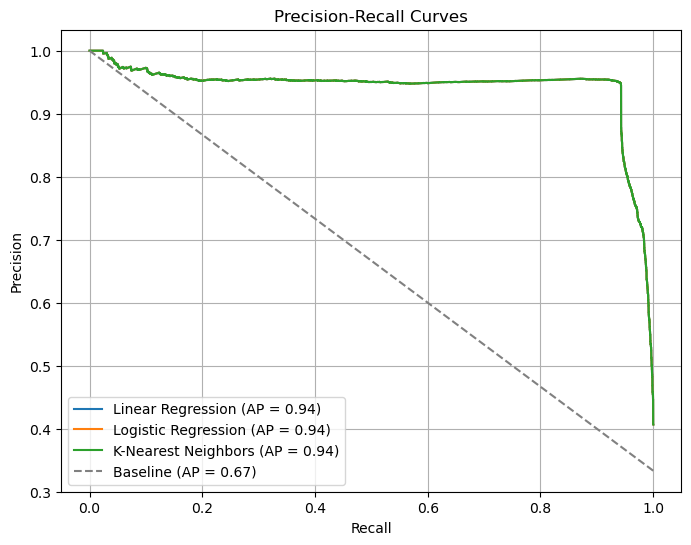

In [24]:
"""
TEST CELL N°10 : PRECISION-RECALL CURVES
   
@pre: the three models (knn, linear and logistic regression) initialized with their tuned hyperparameters.  
@post: a figure with the precision-recall curves for the three given models and also for a simple baseline classifier, 
        applied on a validation set containing 10% of the training set.
------------------------------------------------------------------------------------------------ """

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, accuracy_score
from sklearn.exceptions import NotFittedError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn import svm

# Validation set to use for the PR curves
X_train2, X_val = train_test_split(X_train, test_size=0.1, random_state=42)
y_train2, y_val = train_test_split(y_train_encoded, test_size=0.1, random_state=42)


# Binarization of the output
y_train2_bin = label_binarize(y_train2, classes=[0, 1, 2])
y_val_bin    = label_binarize(y_val, classes=[0, 1, 2])
n_classes    = y_val_bin.shape[1]


model_names = ['Linear Regression', 'Logistic Regression', 'K-Nearest Neighbors']


# Plot precision-recall curves for each model
plt.figure(figsize=(8, 6))


for i, model in enumerate(models):
        try:
                model = svm.SVC(kernel='linear')
                model.fit(X_train, y_train)
                y_score = model.decision_function(X_val)
        except NotFittedError:
                model = svm.SVC(kernel='linear')
                model.fit(X_train2, y_train2)
                y_score = model.decision_function(X_val)
        precision, recall, _ = precision_recall_curve(y_val_bin.ravel(), y_score.ravel())
        average_precision = auc(recall, precision)
        
        plt.plot(recall, precision, label=f'{model_names[i]} (AP = {average_precision:.2f})')

# Plot baseline classifier
dummy = DummyClassifier(strategy='uniform', random_state=42)
dummy.fit(X_train2, y_train2)
y_score = dummy.predict_proba(X_val)
precision, recall, _ = precision_recall_curve(y_val_bin.ravel(), y_score.ravel())
average_precision = auc(recall, precision)
plt.plot(recall, precision, label=f'Baseline (AP = {average_precision:.2f})', linestyle='--', color='grey')


# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid()
plt.show()



<br>

<br><font size=7 color=#009999> <b>PART 4 - MODEL TESTING </b> </font> <br><br>

<div class="alert alert-warning">
    <b>[Question 4.1]</b> Use the test set to estimate the precision, recall and F1 score of your final model and validate its performance on unseen data. <br> Observe if the scores are similar to the ones estimated with your cross-validation.
        Are you satisfied by the performance of your classifier, in view of the task for which it will be used?

</div> 


In [25]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.exceptions import NotFittedError

"""
CELL N°7 : Implementation of precision, recall & F1 scores

@pre:  /  
@post: Follow the specifications to implement precision, recall and probas_to_F1 functions. 
"""

def pred_probas_to_pred_labels(proba_vec, threshold=0.5):
    return np.where(proba_vec <= threshold, 0, 1)

def precision2(true_label, predicted_label):
    return precision_score(true_label, predicted_label)

def recall2(true_label, predicted_label):
    return recall_score(true_label, predicted_label)

def probas_to_F1(true_label, predicted_probabilities, threshold=0.5):
    predicted_labels = pred_probas_to_pred_labels(predicted_probabilities, threshold)
    
    return f1_score(true_label, predicted_labels) 

"""
CELL N°11 : MODEL TESTING
   
@pre:   clf is your selected classifier
        X_test is the numpy array containing the test set (with your selected features)
        y_test is the numpy array contaning your binary target vector
@post:  print the F1, precision and recall on the test set.
------------------------------------------------------------------------------------------------ """

def model_testing(clf, X_Test, y_Test):
    #clf being the classifier that supports predicted labels this python function helps us obtain predictions from the classifier
    try:
        # Try to predict using the existing model
        predicted_label = clf.predict(X_Test)
    except NotFittedError:
        # If the model is not fitted, fit it and then predict
        clf.fit(X_Test, y_Test)
        predicted_label = clf.predict(X_Test)

    predicted_label = pred_probas_to_pred_labels(predicted_label, threshold=0.5)
   
    print("Precision:", precision2(y_Test, predicted_label))
    print("Recall:", recall2(y_Test, predicted_label))
    print("F1 Score:", f1_score(y_Test, predicted_label))


"""
PREPARING THE DATA FOR THE MODELS
"""
y_test_encoded = label_encoder.fit_transform(y_test) # 0 : galaxy, 1 : quasar, 2 : star

#modify y_test in y_test_star in wich star equal 1 and the rest equal 0
y_test_galaxy = np.zeros(len(y_test_encoded))
for i in range(len(y_test_encoded)):
    if y_test_encoded[i] == 0:
        y_test_galaxy[i] = 1
    else:
        y_test_galaxy[i] = 0

y_test_quasar = np.zeros(len(y_test_encoded))
for i in range(len(y_test_encoded)):
    if y_test_encoded[i] == 2:
        y_test_quasar[i] = 1
    else:
        y_test_quasar[i] = 0

y_test_star = np.zeros(len(y_test_encoded))
for i in range(len(y_test_encoded)):
    if y_test_encoded[i] == 1:
        y_test_star[i] = 1
    else:
        y_test_star[i] = 0



#test the functions

for model in models:
    print(model)
    print("Star")
    model_testing(model, X_test, y_test_star)
    print("Galaxy")
    model_testing(model, X_test, y_test_galaxy)
    print("Quasar")
    model_testing(model, X_test, y_test_quasar)



LinearRegression()
Star
Precision: 0.9652733118971061
Recall: 0.7954425013248543
F1 Score: 0.8721673445671121
Galaxy
Precision: 0.033440514469453377
Recall: 0.008807588075880758
F1 Score: 0.013942887786566563
Quasar
Precision: 0.0012861736334405145
Recall: 0.0009053870529651426
F1 Score: 0.0010626992561105207
LogisticRegression(C=1000)
Star
Precision: 0.9501466275659824
Recall: 0.8585055643879174
F1 Score: 0.9020044543429845
Galaxy
Precision: 0.0469208211143695
Recall: 0.013550135501355014
F1 Score: 0.021027730319358652
Quasar
Precision: 0.002932551319648094
Recall: 0.0022634676324128564
F1 Score: 0.0025549310168625446
KNeighborsClassifier(n_neighbors=1, p=1, weights='distance')
Star
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Galaxy
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Quasar
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
